In [110]:
from numpy import *
from netCDF4 import *
from datetime import *
from matplotlib import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm

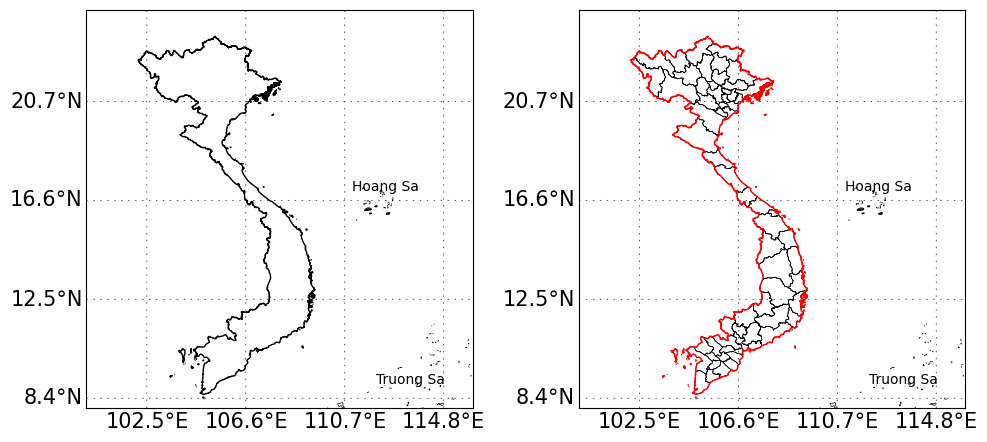

In [111]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,2,1)

lon_min = 100
lon_max = 116
lat_min = 8
lat_max = 24.5
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
map2.readshapefile('Islands/haidao', 'haidao',linewidth=0.5,color='k',zorder=12)
ax.annotate('Hoang Sa', xy=(111, 17), xycoords='data', xytext=(111, 17), textcoords='data')
ax.annotate('Truong Sa', xy=(112, 9), xycoords='data', xytext=(112, 9), textcoords='data')

ax = fig.add_subplot(1,2,2)
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='red',zorder=12)
map2.readshapefile('Islands/haidao', 'haidao',linewidth=0.5,color='k',zorder=12)
ax.annotate('Hoang Sa', xy=(111, 17), xycoords='data', xytext=(111, 17), textcoords='data')
ax.annotate('Truong Sa', xy=(112, 9), xycoords='data', xytext=(112, 9), textcoords='data')
plt.tight_layout()
plt.show()

2. Work with netcdf data

In [112]:
nc_path = 'wrfout_d02_2019-11-12_sample.nc'
nc_file = Dataset(nc_path,'r')
data = squeeze(nc_file.variables['T2'][:])
print ('Shape of data: ', data.shape)
lat = squeeze(nc_file.variables['XLAT'][:])
lon = squeeze(nc_file.variables['XLONG'][:])
print ('Shape of lat and lon:', lat.shape, lon.shape)

Shape of data:  (24, 120, 111)
Shape of lat and lon: (120, 111) (120, 111)


3. Continue

C:\Users\J3rryTr\AppData\Local\Temp\ipykernel_1316\4012768634.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


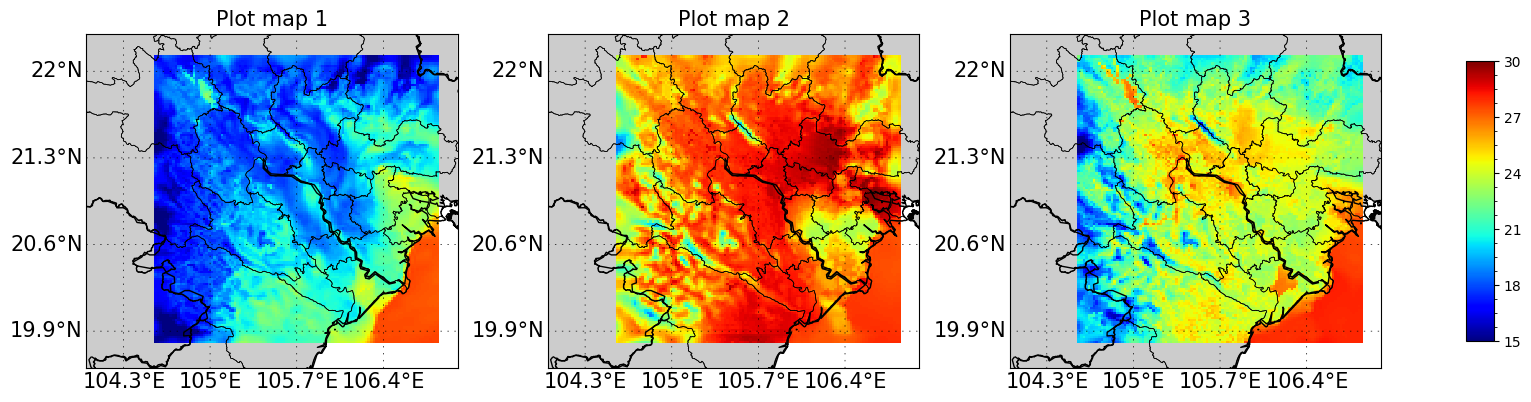

In [113]:
fig = plt.figure(figsize=(14,7))

lon_min = 104
lon_max = 107
lat_min = 19.6
lat_max = 22.3

# Plot map 1
ax = fig.add_subplot(1,3,1)
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
map2.fillcontinents(zorder=0)
map2.drawcoastlines(zorder=11)
map2.drawcountries(linewidth=1,color='k')
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
cm = plt.pcolormesh( lon , lat , data[0,:,:]-273.15,vmin = 15,vmax = 30,cmap='jet') #plot map 1
plt.title('Plot map 1', fontsize=15)

# Plot map 2
ax = fig.add_subplot(1,3,2)
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
map2.fillcontinents(zorder=0)
map2.drawcoastlines(zorder=11)
map2.drawcountries(linewidth=1,color='k')
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
cm = plt.pcolormesh( lon , lat , data[6,:,:]-273.15,vmin = 15,vmax = 30,cmap='jet') #plot map 2
plt.title('Plot map 2', fontsize=15)

# Plot map 3
ax = fig.add_subplot(1,3,3)
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
map2.fillcontinents(zorder=0)
map2.drawcoastlines(zorder=11)
map2.drawcountries(linewidth=1,color='k')
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
cm = plt.pcolormesh( lon , lat , data[12,:,:]-273.15,vmin = 15,vmax = 30,cmap='jet') #plot map 3
plt.title('Plot map 3', fontsize=15)

#plot all map
fig.subplots_adjust(right=0.8)
fig.colorbar(cm,cax=fig.add_axes([1.05, 0.3, 0.02, 0.4]), ticks= linspace(15, 30, 6, endpoint=True), location = 'right', orientation='vertical').minorticks_on()
plt.tight_layout()
plt.show()

EX3

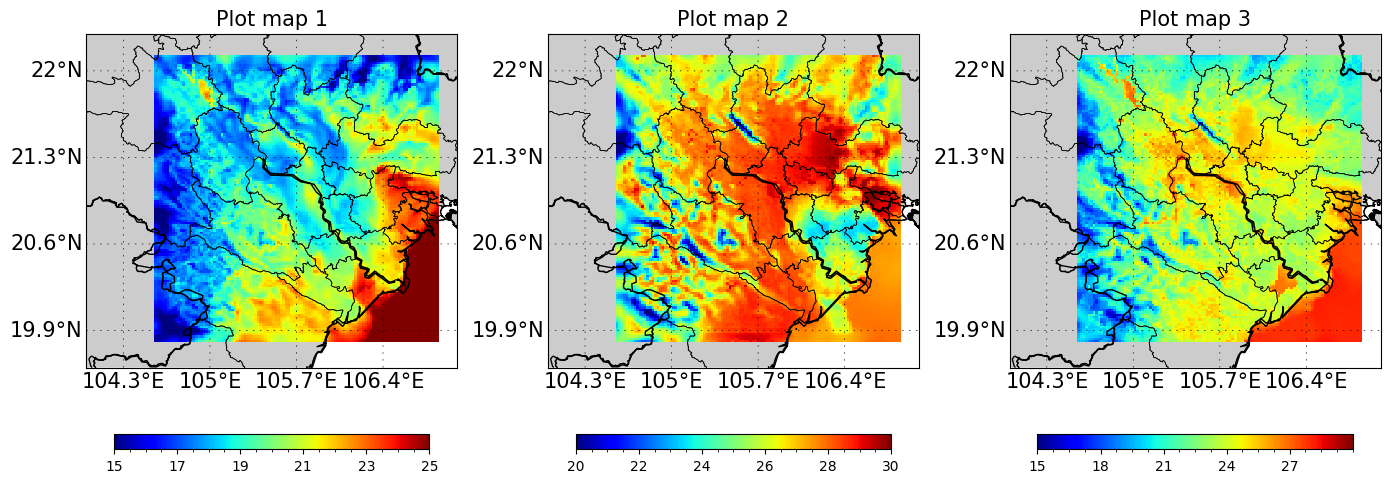

In [114]:
fig = plt.figure(figsize=(14,7))
lon_min = 104
lon_max = 107
lat_min = 19.6
lat_max = 22.3


# Plot map 1
ax1 = fig.add_subplot(1,3,1)
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
map2.fillcontinents(zorder=0)
map2.drawcoastlines(zorder=11)
map2.drawcountries(linewidth=1,color='k')
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')
#FOR NORMAL SCALE
cm = ax1.pcolormesh( lon , lat , data[0,:,:]-273.15,vmin = 15,vmax = 25,cmap='jet') #plot map 1
Plt1 = fig.colorbar(cm, ax=ax1, ticks= linspace(15, 25, 6, endpoint=True), location = 'bottom', orientation='horizontal', fraction=0.05, shrink = 0.85, pad = 0.1).minorticks_on()
plt.title('Plot map 1', fontsize=15)

# Plot map 2
ax2 = fig.add_subplot(1,3,2)
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
map2.fillcontinents(zorder=0)
map2.drawcoastlines(zorder=11)
map2.drawcountries(linewidth=1,color='k')
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')
#FOR NORMAL SCALE
cm = ax2.pcolormesh( lon , lat , data[6,:,:]-273.15,vmin = 20,vmax = 30,cmap='jet') #plot map 2
Plt2 = fig.colorbar(cm, ax=ax2, ticks= linspace(20, 30, 6, endpoint=True), location = 'bottom', orientation='horizontal', fraction=0.05, shrink = 0.85, pad = 0.1).minorticks_on()
plt.title('Plot map 2', fontsize=15)


# Plot map 3
ax3 = fig.add_subplot(1,3,3)
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min, urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
map2.fillcontinents(zorder=0)
map2.drawcoastlines(zorder=11)
map2.drawcountries(linewidth=1,color='k')
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1))
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',linewidth=0.5,color='k',zorder=12)
map2.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'gadm41_VNM_0',linewidth=1,color='k',zorder=12)
cm = plt.pcolormesh( lon , lat , data[12,:,:]-273.15,vmin = 15,vmax = 30,cmap='jet') #plot map 3
Plt3 = fig.colorbar(cm, ax=ax3, ticks= arange(15,30,3), location = 'bottom', orientation='horizontal', fraction=0.05, shrink = 0.85, pad = 0.1).minorticks_on()
plt.title('Plot map 3', fontsize=15)


#plot all map
plt.tight_layout()
plt.show()